# Import libs

Income Classification for Kaggle Dataset

<a href="https://www.kaggle.com/lodetomasi1995/income-classification"/>

In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import shap
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

# Load Dataset

In [1]:
income_df = pd.read_csv("income_evaluation.csv")
income_df.head()

NameError: name 'pd' is not defined

In [4]:
income_df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [17]:
# remove empty spaces at the beginning of col names
income_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

# EDA

In [18]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [62]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
            'race', 'sex', 'native-country']

cont_cols = [col for col in income_df.columns if col not in cat_cols]

In [63]:
income_df.loc[:, cat_cols[:3]].value_counts()

workclass     education      marital-status        
 Private       HS-grad        Married-civ-spouse       3315
                              Never-married            2565
               Some-college   Never-married            2162
                              Married-civ-spouse       1858
               Bachelors      Married-civ-spouse       1747
                                                       ... 
 State-gov     1st-4th        Widowed                     1
               7th-8th        Divorced                    1
 Federal-gov   Some-college   Married-AF-spouse           1
               Prof-school    Separated                   1
 Without-pay   Some-college   Married-spouse-absent       1
Length: 531, dtype: int64

In [64]:
income_df.loc[:, cat_cols[3:]].value_counts()

occupation          relationship     race                 sex      native-country
 Craft-repair        Husband          White                Male     United-States    2165
 Exec-managerial     Husband          White                Male     United-States    1910
 Prof-specialty      Husband          White                Male     United-States    1509
 Sales               Husband          White                Male     United-States    1343
 Transport-moving    Husband          White                Male     United-States     805
                                                                                     ... 
 Machine-op-inspct   Husband          White                Male     Columbia            1
                                                                    Iran                1
 Sales               Other-relative   Asian-Pac-Islander   Male     India               1
                                                           Female   South               1
 Handlers-cleaners

Text(0.5, 0, 'age')

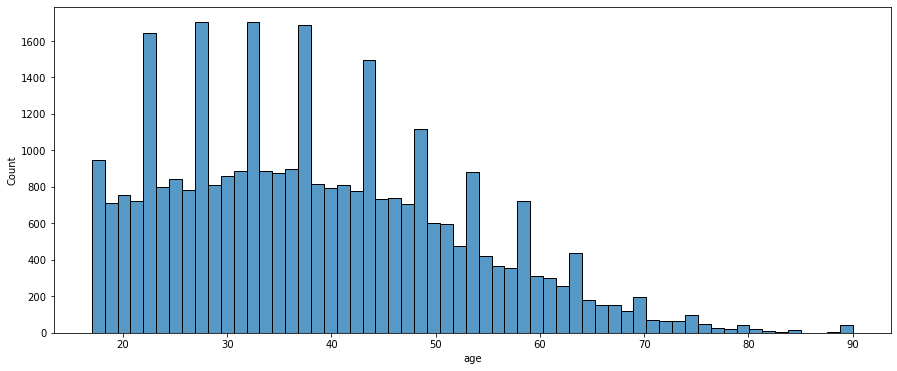

In [65]:
i=0

plt.figure(figsize=(15,6))
sns.histplot(income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'fnlwgt')

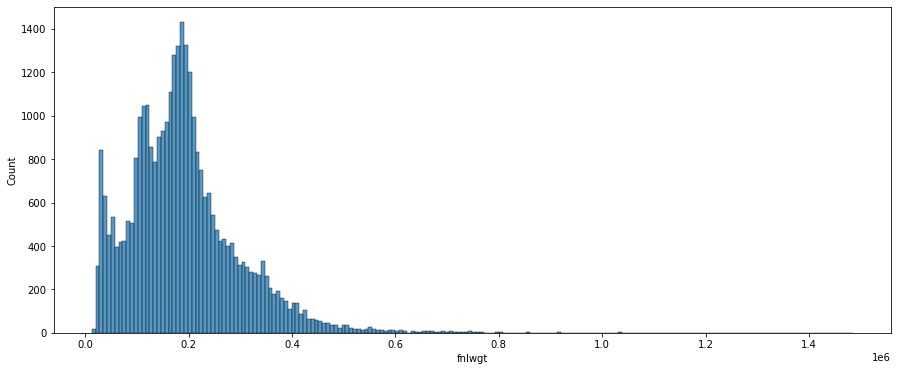

In [66]:
i=1

plt.figure(figsize=(15,6))
sns.histplot(income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'education-num')

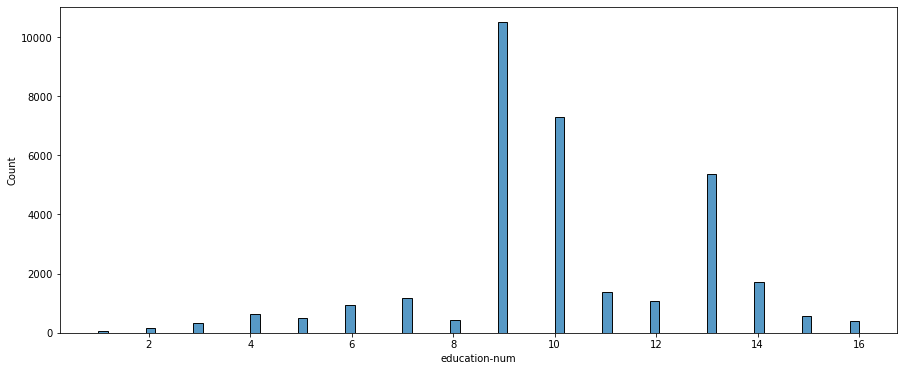

In [67]:
i=2

plt.figure(figsize=(15,6))
sns.histplot(income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'capital-gain')

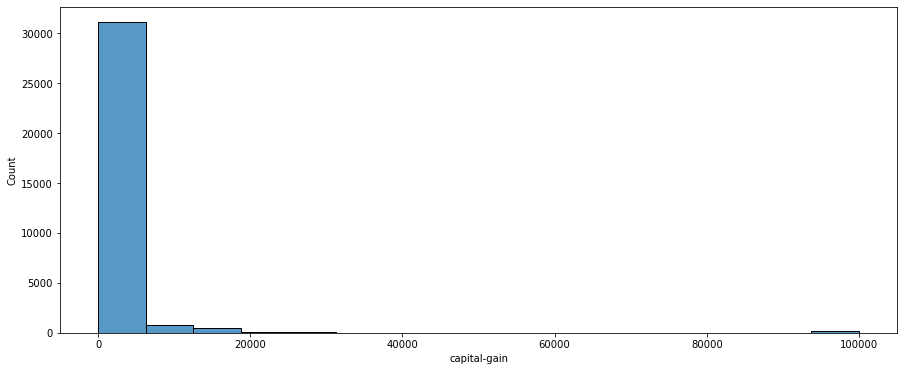

In [68]:
i=3

plt.figure(figsize=(15,6))
sns.histplot(income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'capital-loss')

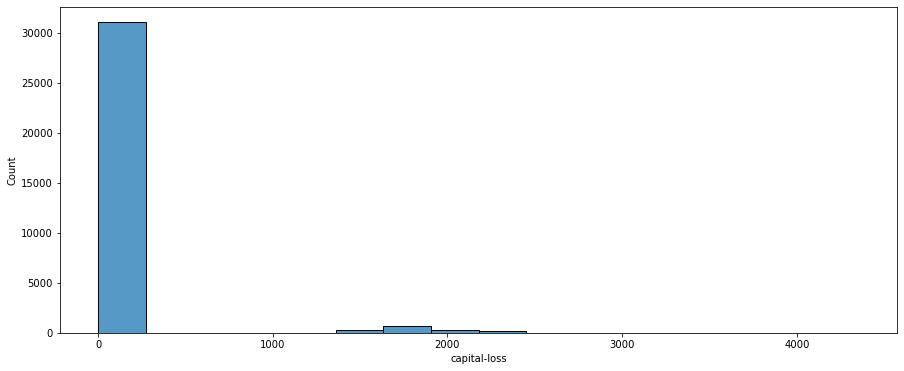

In [69]:
i=4

plt.figure(figsize=(15,6))
sns.histplot(income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'capital-loss')

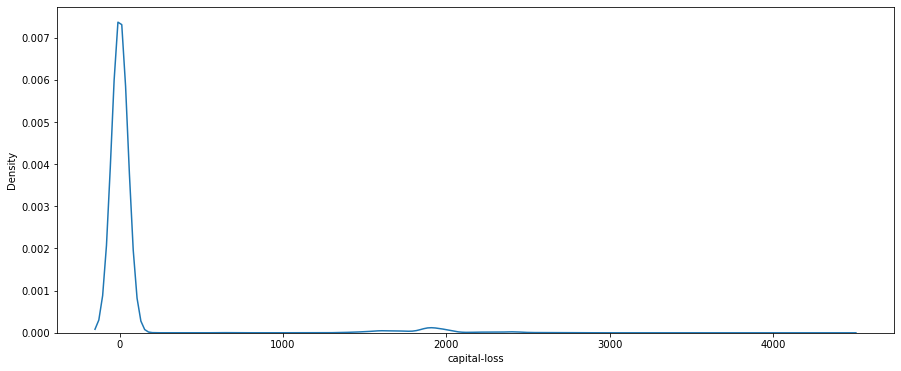

In [85]:
i=4

plt.figure(figsize=(15,6))
sns.kdeplot(data=income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'hours-per-week')

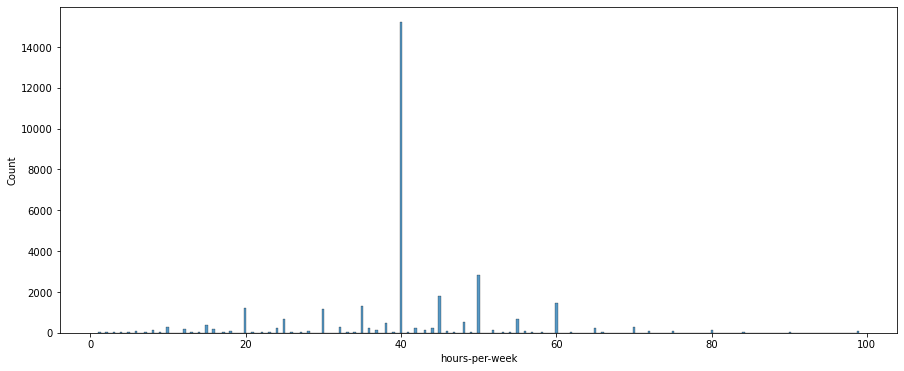

In [82]:
i=5

plt.figure(figsize=(15,6))
sns.histplot(data=income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'hours-per-week')

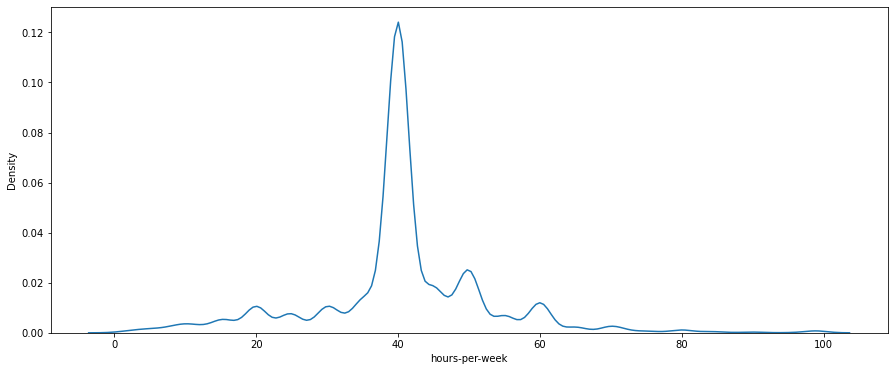

In [84]:
i=5

plt.figure(figsize=(15,6))
sns.kdeplot(data=income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'income')

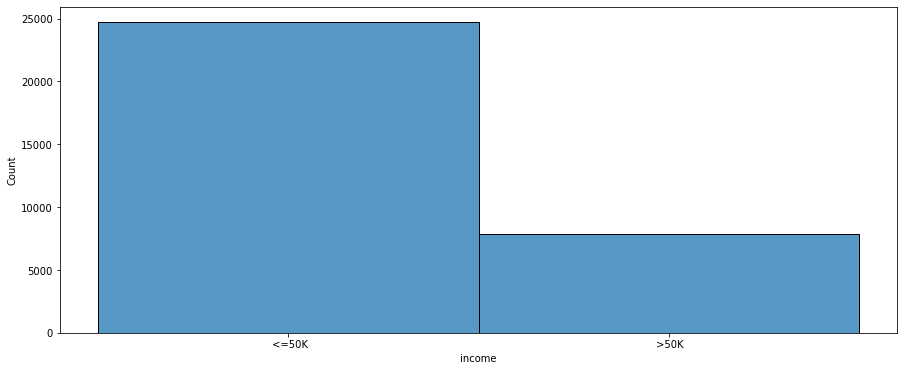

In [71]:
i=6

plt.figure(figsize=(15,6))
sns.histplot(income_df, x=cont_cols[i])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'workclass')

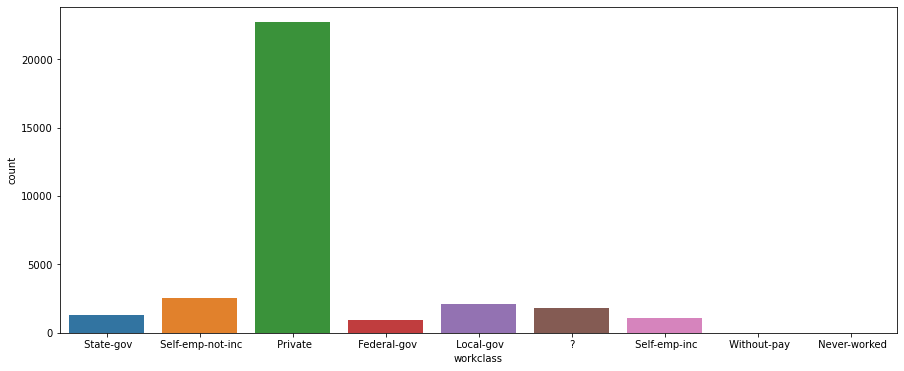

In [72]:
i=0

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'education')

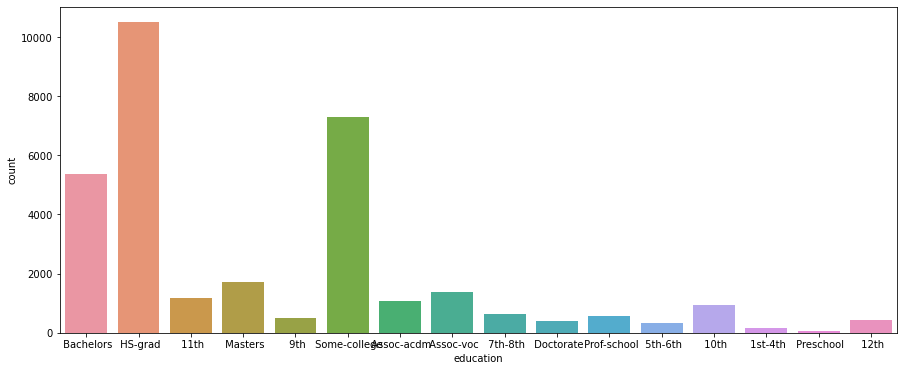

In [73]:
i=1

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'marital-status')

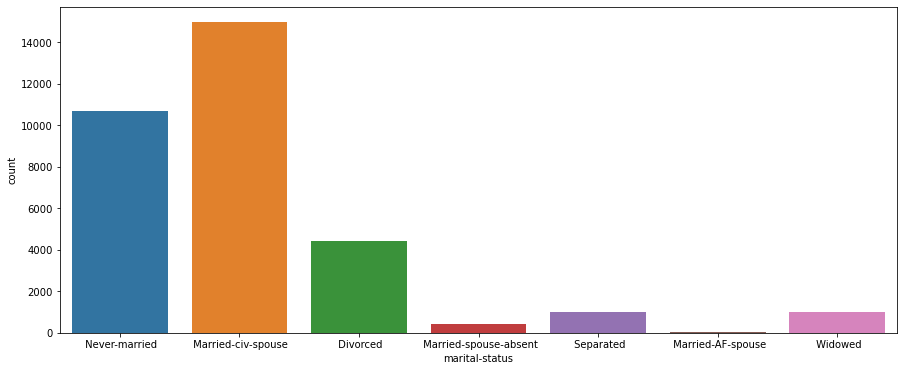

In [74]:
i=2

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'occupation')

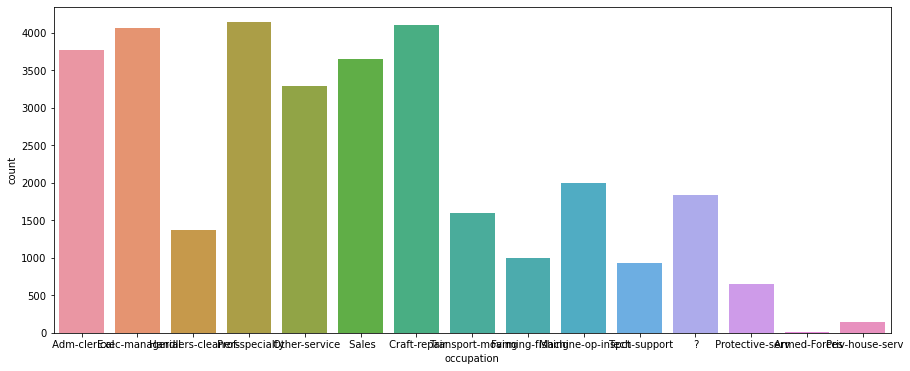

In [75]:
i=3

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'relationship')

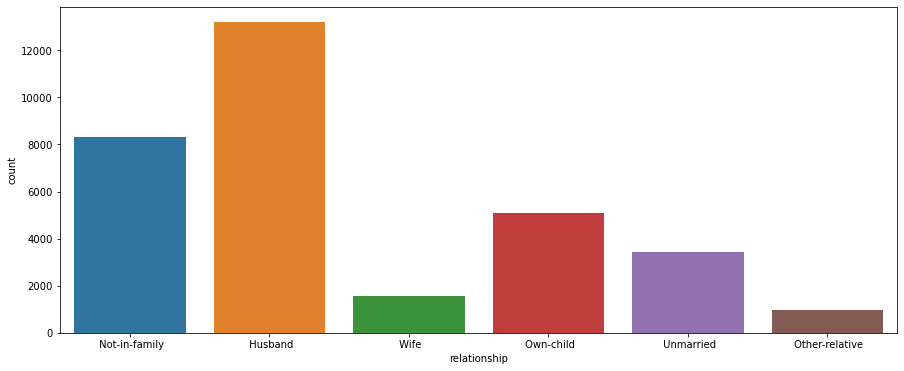

In [76]:
i=4

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'race')

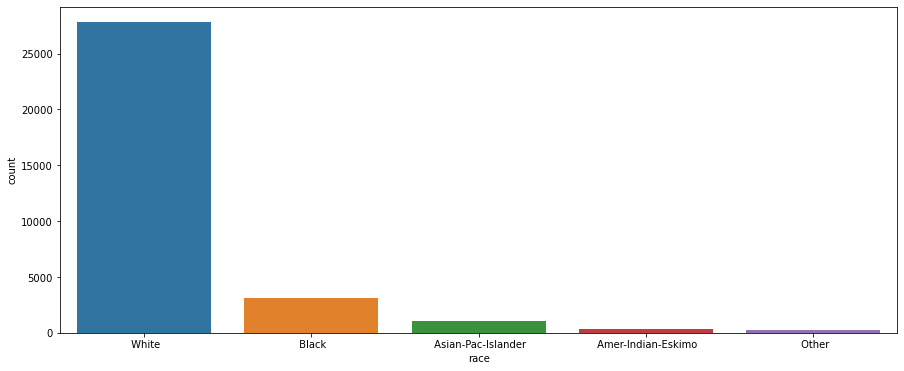

In [77]:
i=5

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'sex')

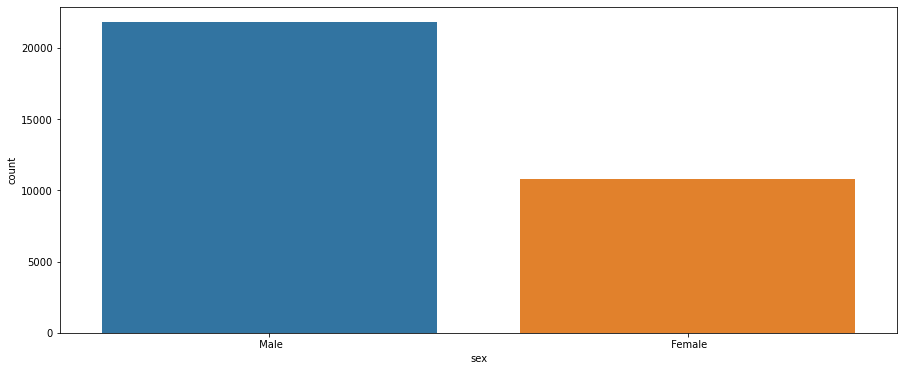

In [78]:
i=6

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'native-country')

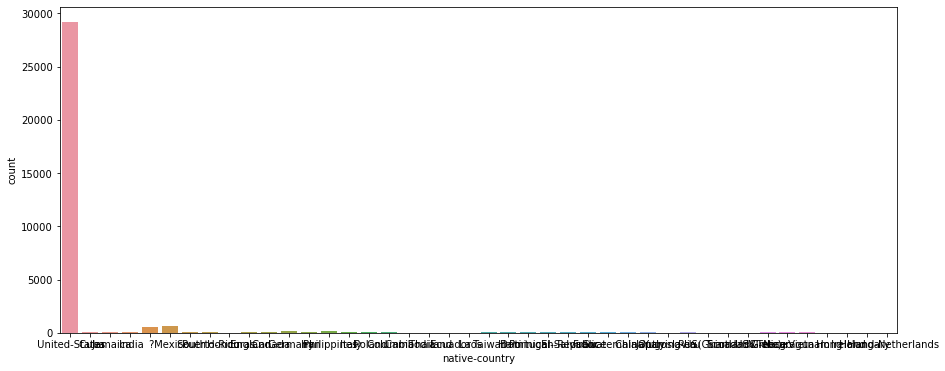

In [79]:
i=7

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i])
plt.xlabel(cat_cols[i])

## EDA Bi-variate

Text(0.5, 0, 'age')

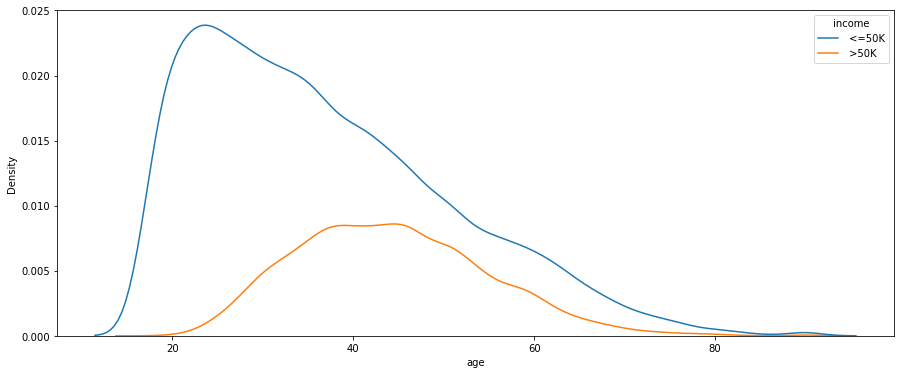

In [243]:
i=0

plt.figure(figsize=(15,6))
sns.kdeplot(data=income_df, x=cont_cols[i], hue=income_df.columns[-1])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'fnlwgt')

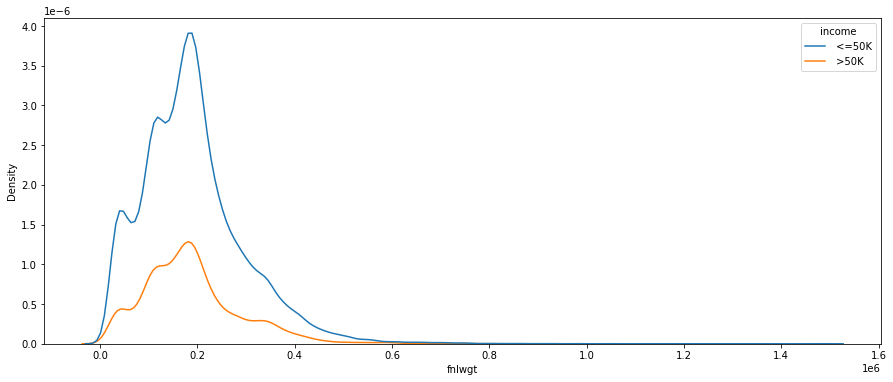

In [242]:
i=1

plt.figure(figsize=(15,6))
sns.kdeplot(data=income_df, x=cont_cols[i], hue=income_df.columns[-1])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'education-num')

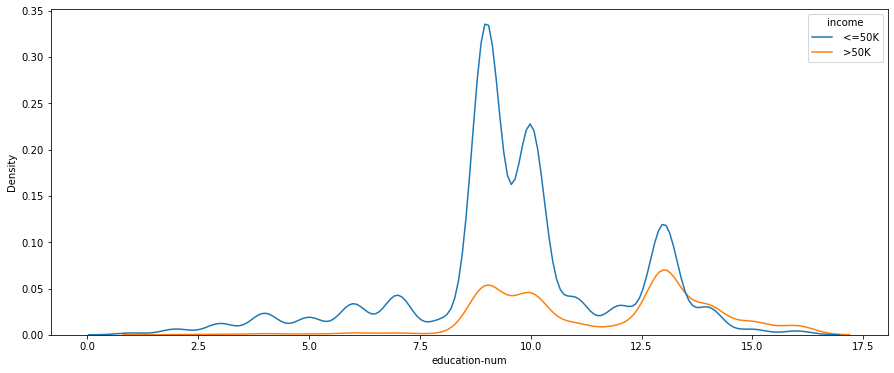

In [241]:
i=2

plt.figure(figsize=(15,6))
sns.kdeplot(data=income_df, x=cont_cols[i], hue=income_df.columns[-1])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'capital-gain')

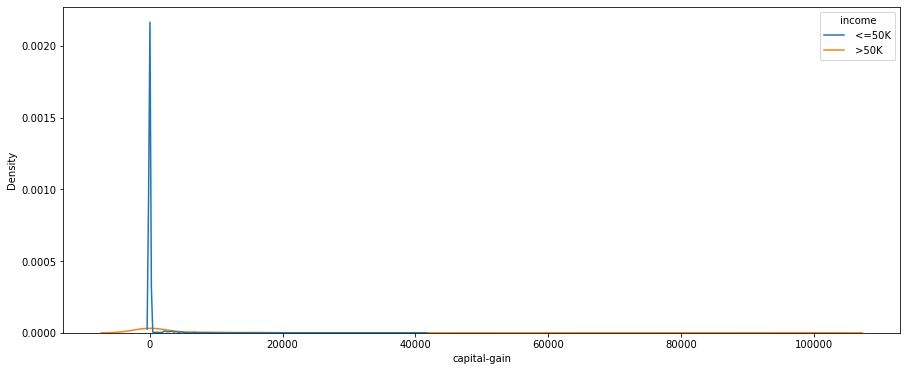

In [240]:
i=3

plt.figure(figsize=(15,6))
sns.kdeplot(data=income_df, x=cont_cols[i], hue=income_df.columns[-1])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'capital-loss')

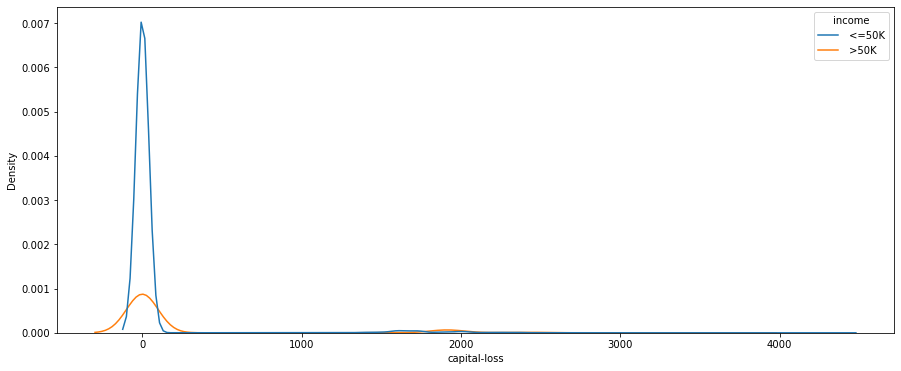

In [229]:
i=4

plt.figure(figsize=(15,6))
sns.kdeplot(data=income_df, x=cont_cols[i], hue=income_df.columns[-1])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'hours-per-week')

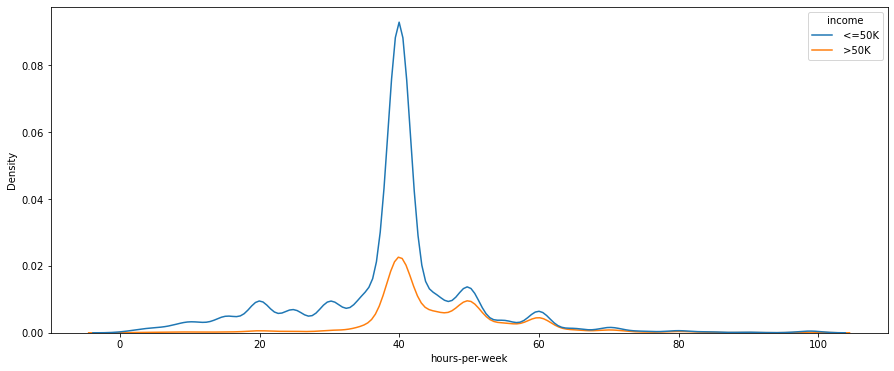

In [228]:
i=5

plt.figure(figsize=(15,6))
sns.kdeplot(data=income_df, x=cont_cols[i], hue=income_df.columns[-1])
plt.xlabel(cont_cols[i])

Text(0.5, 0, 'workclass')

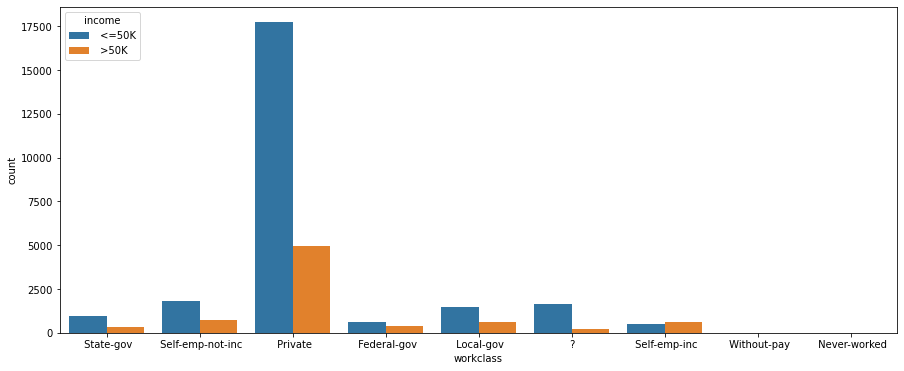

In [234]:
i=0

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i], hue=income_df.columns[-1])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'education')

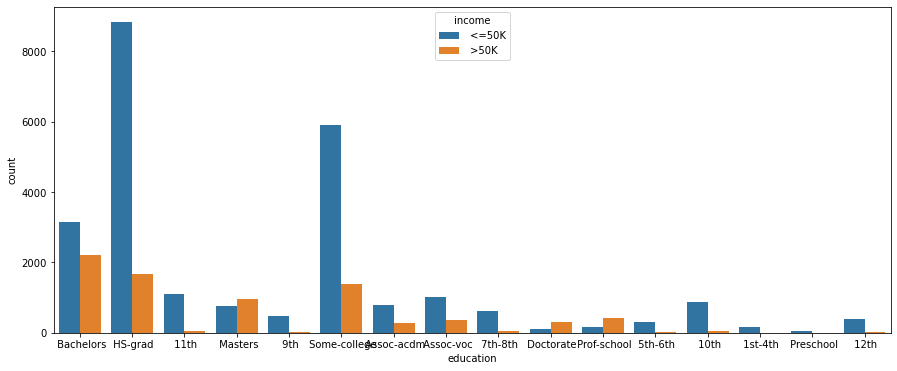

In [235]:
i=1

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i], hue=income_df.columns[-1])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'marital-status')

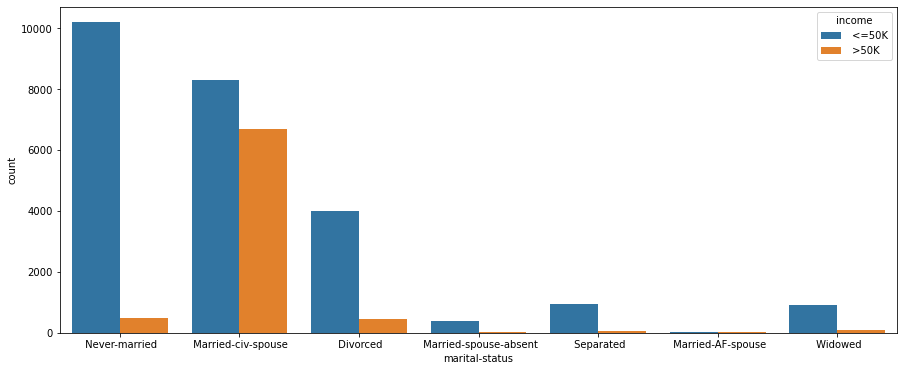

In [236]:
i=2

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i], hue=income_df.columns[-1])
plt.xlabel(cat_cols[i])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

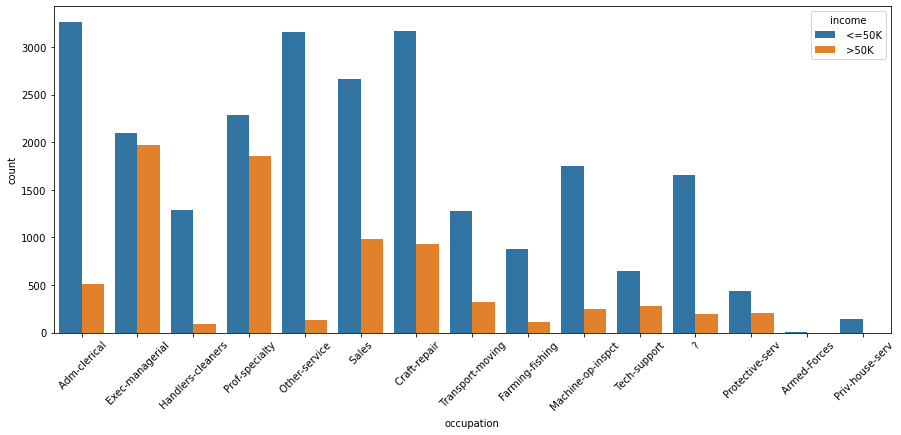

In [244]:
i=3

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i], hue=income_df.columns[-1])
plt.xlabel(cat_cols[i])
plt.xticks(rotation=45)

Text(0.5, 0, 'relationship')

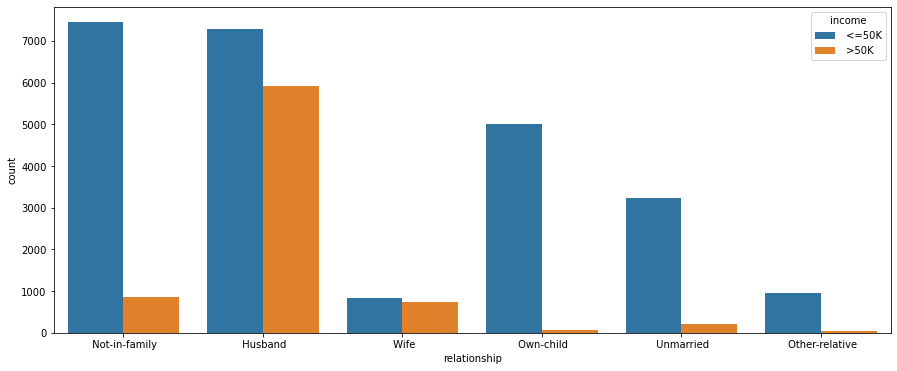

In [238]:
i=4

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i], hue=income_df.columns[-1])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'race')

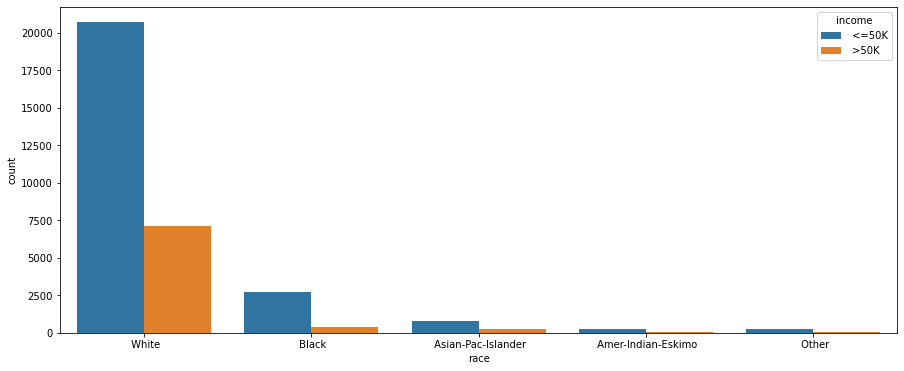

In [239]:
i=5

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i], hue=income_df.columns[-1])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'sex')

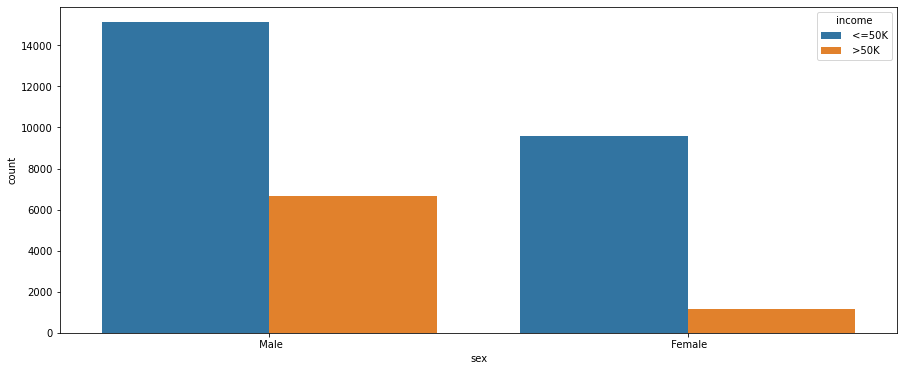

In [233]:
i=6

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i], hue=income_df.columns[-1])
plt.xlabel(cat_cols[i])

Text(0.5, 0, 'native-country')

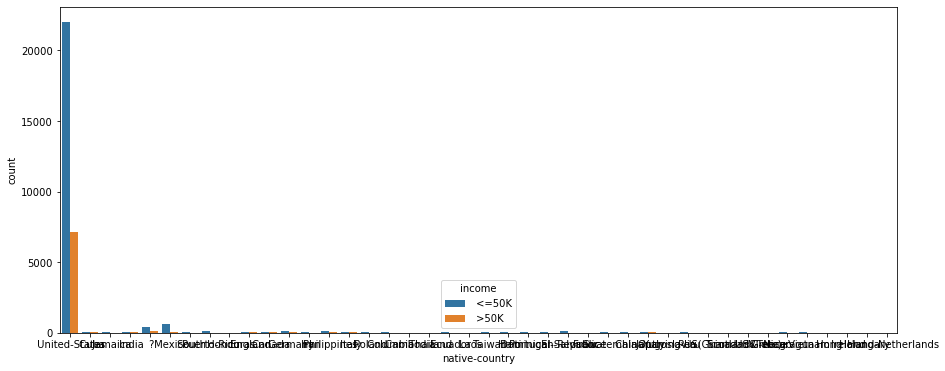

In [245]:
i=7

plt.figure(figsize=(15,6))
sns.countplot(data=income_df, x=cat_cols[i], hue=income_df.columns[-1])
plt.xlabel(cat_cols[i])

# Preprocessing

## Continuous columns

Text(0.5, 0, 'age')

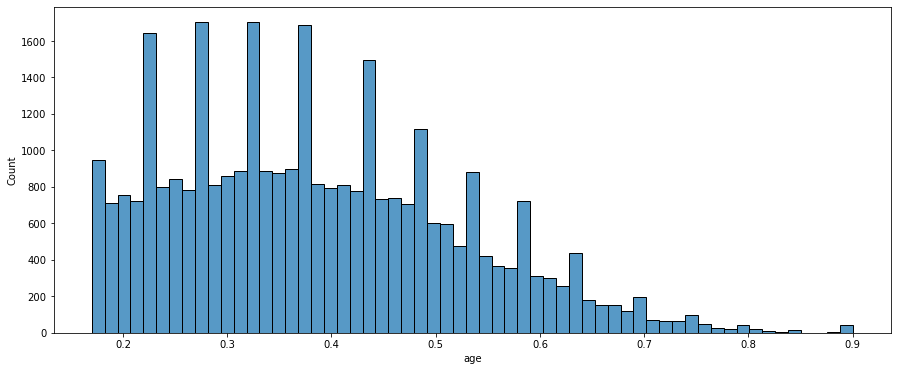

In [158]:
# Divide age by 100 to scale from o to 1

df = income_df.copy()

df["age"] = df["age"] / 100
plt.figure(figsize=(15,6))
sns.histplot(df, x="age")
plt.xlabel("age")

In [159]:
# fnlwgt,education-num, capital-gain,  capital-loss apply minmaxscale

scaler = MinMaxScaler()
df[["fnlwgt","education-num", "capital-gain",  "capital-loss"]] = scaler.fit_transform(df[["fnlwgt","education-num", "capital-gain",  "capital-loss"]])

Text(0.5, 0, 'hours-per-week')

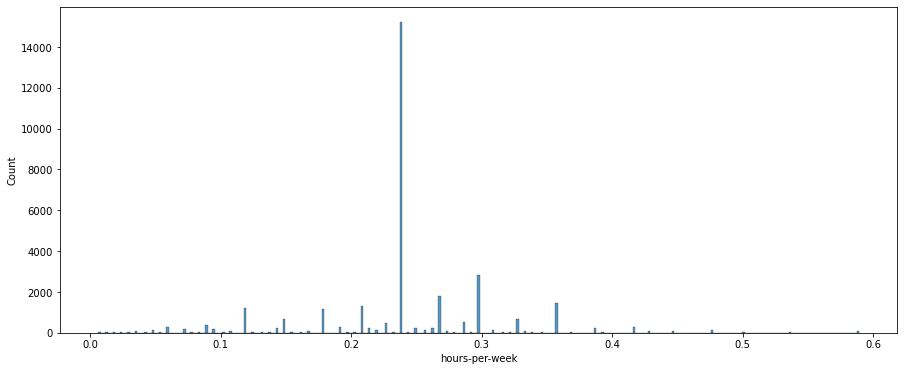

In [160]:
# divide hours_per_week by 24*7 to scale from 0 to 1

df["hours-per-week"] = df["hours-per-week"] / (24*7)
plt.figure(figsize=(15,6))
sns.histplot(df, x="hours-per-week")
plt.xlabel("hours-per-week")

In [161]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.385816,0.120545,0.605379,0.010777,0.020042,0.240699
std,0.136404,0.071685,0.171515,0.073854,0.092507,0.073497
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.005952
25%,0.280000,0.071679,0.533333,0.000000,0.000000,0.238095
50%,0.370000,0.112788,0.600000,0.000000,0.000000,0.238095
75%,0.480000,0.152651,0.733333,0.000000,0.000000,0.267857
max,0.900000,1.000000,1.000000,1.000000,1.000000,0.589286


## Categorical columns

In [162]:
df_cat = pd.get_dummies(df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
            'race', 'sex']], drop_first=True)

df = pd.concat([df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
            'race', 'sex'], axis=1), df_cat], axis=1)

df["native_country_us"] = df["native-country"].apply(lambda x : 1 if x.replace(" ", "") =="United-States" else 0)
df.drop(["native-country"], axis=1, inplace=True)

df["income_above_50k"] = df["income"].apply(lambda x : 1 if x.replace(" ", "") == ">50K" else 0)
df.drop(["income"], axis=1, inplace=True)

prep_df = df.copy()

In [169]:
prep_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_us,income_above_50k
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.385816,0.120545,0.605379,0.010777,0.020042,0.240699,0.029483,0.064279,0.000215,0.697030,...,0.155646,0.105832,0.048156,0.031909,0.095943,0.008323,0.854274,0.669205,0.895857,0.240810
std,0.136404,0.071685,0.171515,0.073854,0.092507,0.073497,0.169159,0.245254,0.014661,0.459549,...,0.362525,0.307627,0.214099,0.175761,0.294518,0.090851,0.352837,0.470506,0.305451,0.427581
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.005952,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280000,0.071679,0.533333,0.000000,0.000000,0.238095,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.370000,0.112788,0.600000,0.000000,0.000000,0.238095,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.480000,0.152651,0.733333,0.000000,0.000000,0.267857,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,0.900000,1.000000,1.000000,1.000000,1.000000,0.589286,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Split Dataset into train, test

In [175]:
X, y = prep_df.iloc[: , :-1] , prep_df.iloc[:, -1]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2 )

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(26048, 60) (6513, 60)
(26048,) (6513,)


# Model - Build, Compile, Fit, Evaluate

In [179]:
model = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                3660      
                                                                 
 dense_4 (Dense)             (None, 15)                915       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 4,591
Trainable params: 4,591
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
814/814 [==============================] - 2s 2ms/step - loss: 0.3797 - accuracy: 0.8226
Epoch 2/5
814/814 [==============================] - 2s 2ms/step - loss: 0.3393 - accuracy: 0.8419
Epoch 3/5
814/814 [==============================] - 2s 2ms/step - loss: 0.3275 - accuracy: 0.8492
Epoch 4/5
814/814 [==============================] - 2s 2ms/step - loss: 0.3212 - accuracy: 0.8497
Epoch 5/5
814/814 [==============================] - 2s 2ms/step - loss: 0.3183 - accuracy: 0.8517


In [182]:
model.evaluate(X_test, y_test)

204/204 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.8551


[0.31592845916748047, 0.8550590872764587]

In [183]:
y_pred = model.predict(X_test).round().reshape(len(X_test))
y_pred[:5]

In [191]:
print(classification_report(y_test, model.predict(X_test).round().reshape(len(X_test))))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.75      0.60      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [192]:
model.save("model_v1")

INFO:tensorflow:Assets written to: model_v1\assets


In [255]:
class MyIncomeClassifier:
    def __init__(self):
        
        self._classifier = keras.Sequential([
                keras.layers.Dense(60, input_shape=(60,), activation="relu"),
                keras.layers.Dense(15, activation="relu"),
                keras.layers.Dense(1, activation="sigmoid")
            ])

        self._classifier.compile(optimizer="adam",
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

        print(self._classifier.summary())
        
    def fit_model(self, X, y, epochs=5):        
        self._classifier.fit(X, y, epochs=epochs)
        
    def print_eval_report(self,X,y):
        print(self._classifier.evaluate(X, y))
    
    def print_classificaiton_report(self, X, y):
        print(classification_report(y, self._classifier.predict(X).round().reshape(len(X))))
    
    def save_model(self):
        self._classifier.save("model_v1")

In [258]:
classifier = MyIncomeClassifier()
classifier.fit_model(X_train, y_train, epochs=5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 60)                3660      
                                                                 
 dense_10 (Dense)            (None, 15)                915       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 4,591
Trainable params: 4,591
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


AttributeError: in user code:

    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\explainers\_deep\deep_tf.py", line 26, in custom_record_gradient
        out = tf_backprop._record_gradient("shap_"+op_name, inputs, attrs, results)

    AttributeError: Exception encountered when calling layer "sequential_3" (type Sequential).
    
    module 'tensorflow.python.eager.backprop' has no attribute '_record_gradient'
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(32, 60), dtype=float64)
      • training=True
      • mask=None


# Explainer - SHAP -> Update TF / SHAP to fix the bug

In [226]:
!pip install git+git://github.com/filusn/shap.git@e6f842573943332d6bcc941f46d3c96dc2ac793f

  Cloning git://github.com/filusn/shap.git (to revision e6f842573943332d6bcc941f46d3c96dc2ac793f) to c:\users\i301903\appdata\local\temp\pip-req-build-i5xpz3jb
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
Failed to build shap


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\I301903\AppData\Local\Continuum\anaconda3\python.exe' 'C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\I301903\AppData\Local\Temp\tmpa67np0uu'
       cwd: C:\Users\I301903\AppData\Local\Temp\pip-req-build-i5xpz3jb
  Complete output (10 lines):
  The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to enable CUDA
  Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
  running bdist_wheel
  running build
  running build_py
  running build_ext
  numpy.get_include() C:\Users\I301903\AppData\Local\Temp\pip-build-env-3sjwyy4n\overlay\Lib\site-packages\numpy\core\include
  building 'shap._cext' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  --------

In [221]:
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough 
shap.explainers._deep.deep_tf.op_handlers["BatchMatMulV2"] = shap.explainers._deep.deep_tf.passthrough 
shap.explainers._deep.deep_tf.op_handlers["TensorListStack"] = shap.explainers._deep.deep_tf.passthrough 
shap.explainers._deep.deep_tf.op_handlers["StatelessWhile"] = shap.explainers._deep.deep_tf.passthrough 
shap.explainers._deep.deep_tf.op_handlers["TensorListFromTensor"] = shap.explainers._deep.deep_tf.passthrough 
shap.explainers._deep.deep_tf.op_handlers["Sin"] = shap.explainers._deep.deep_tf.passthrough

In [222]:
# select a set of background examples to take an expectation over

# X_train.iloc[np.random.choice(X_train.shape[0], 1000, replace=False),:]
background = np.array(X_train.sample(100))
background

array([[0.17      , 0.03605153, 0.4       , ..., 1.        , 0.        ,
        1.        ],
       [0.3       , 0.05260048, 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [0.56      , 0.01840168, 0.6       , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.21      , 0.13156776, 0.6       , ..., 0.        , 1.        ,
        1.        ],
       [0.48      , 0.11939256, 0.53333333, ..., 1.        , 1.        ,
        1.        ],
       [0.37      , 0.09472773, 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [225]:
# explain predictions of the model on four images
explainer = shap.DeepExplainer(model, background)

# ...or pass tensors directly
#e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = explainer.shap_values(background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: in user code:

    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\explainers\_deep\deep_tf.py", line 243, in grad_graph  *
        out = self.model(shap_rAnD)
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\explainers\_deep\deep_tf.py", line 26, in custom_record_gradient
        out = tf_backprop._record_gradient("shap_"+op_name, inputs, attrs, results)

    AttributeError: Exception encountered when calling layer "dense_3" (type Dense).
    
    module 'tensorflow.python.eager.backprop' has no attribute '_record_gradient'
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(200, 60), dtype=float32)


In [213]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

NameError: name 'shap_values' is not defined

# f1-score for class "1" is not good enough. how can this be improved?

In [266]:
model1 = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 60)                3660      
                                                                 
 dense_19 (Dense)            (None, 15)                915       
                                                                 
 dense_20 (Dense)            (None, 1)                 16        
                                                                 
Total params: 4,591
Trainable params: 4,591
Non-trainable params: 0
_________________________________________________________________


In [267]:
model1.fit(X_train, y_train, epochs=5)

Epoch 1/5


AttributeError: in user code:

    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        - A `tf.data.Dataset`.
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        validation_data: Data on which to evaluate
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        def run_step(data):
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\explainers\_deep\deep_tf.py", line 26, in custom_record_gradient
        out = tf_backprop._record_gradient("shap_"+op_name, inputs, attrs, results)

    AttributeError: Exception encountered when calling layer "sequential_6" (type Sequential).
    
    module 'tensorflow.python.eager.backprop' has no attribute '_record_gradient'
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(32, 60), dtype=float64)
      • training=True
      • mask=None
